## Анализ вакансий.


In [ ]:
!pip install -q tqdm
!pip install -q forex-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 822.9 kB/s eta 0:00:00


In [ ]:
import requests
from time import sleep
import json
from tqdm import tqdm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import ast
from forex_python.converter import CurrencyRates
import folium
from IPython.display import IFrame

sns.set(style="whitegrid", font_scale=1.3, palette="Set2")


Второй курс &mdash; самое время задуматься о будущей профессии и проанализировать существующие предложения. Дело тут даже не в том, чтобы найти интересную стажировку. В первую очередь сейчас стоит подумать о том, в какую сторону развиваться дальше. Например, если вы хотите работать в какой-либо конкретной профессии, то наверняка стоит развивать какие-то определенные навыки, и даже выбрать подходящую кафедру. Анализ существующих вакансий поможет определить, какие навыки вам нужны.

**Внимание!**
В первую очередь задание призвано помочь вам понять, какие навыки стоит развивать, и может быть даже выбрать подходящую кафедру. Однако, не стоит идти на работу/стажировку раньше времени. Даже только летнюю, абсолютное большинство людей не могут работать круглый год без перерыва. У всех из вас 3 курс достаточно нагруженный, а на DS-потоке нагрузка с первой недели сентября. И если вы идете на стажировку, то каникул у вас может просто не остаться. Даже если вам сейчас/летом/в сентябре кажется "я же справлюсь", к ноябрю-декабрю с большой вероятностью вы выдохнетесь. Таких примеров *очень много*. Не все, кто-то успешно справляется совмещать работу и учебу, но таких *очень мало*. Берегите себя и свое здоровье :)

---

Задание предполагает вариативность исследуемых данных. Вы можете выбрать один из следующих вариантов.
1. Стандартный вариант &mdash; проанализировать вакансии на сайте <a target="_blank" href="https://hh.ru/">hh.ru</a> с использованием <a target="_blank" href="https://dev.hh.ru/">официального API</a>. Далее приведен пример работы с этим API. *Если вы не достаточно уверены в своих силах, рекомендуется выбрать этот вариант.*
2. Разобраться с API других сервисов по поиску вакансий, например, <a target="_blank" href="https://career.habr.com/">Хабр.Карьера</a> или <a target="_blank" href="https://www.superjob.ru/">SuperJob</a>.
3. Извлечение данных с помощью <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html#2.-Парсинг-HTML-напрямую">парсинга HTML напрямую</a> некоторых сайтов. Например, вы можете попробовать напрямую распарсить пул вакансий из тех источников, которые не предоставляют API. **Внимание! Обращайте внимание на пользовательские соглашения и на <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html#Сбор-данных-из-открытых-источников">эти рекомендации</a>.**
4. Комбинирование нескольких подходов. В этом случае нужно понимать, как находить одинаковые вакансии из разных источников для избежания их двойного учета.
5. Можно также *дополнительно* брать архивные данные из недавнего прошлого, например, из <a target="_blank" href="https://boosters.pro/championship/HeadHunter/overview/description">этого соревнования</a>.

Перед выполнением задания ознакомьтесь с <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html">материалом</a> о сборе данных из открытых источников.

Для получения максимального балла за задание достаточно выполнить все задание по стандартному варианту. Альтернативные варианты, даже более сложные, не дают больше баллов, чем максимальное количество баллов по стандартному варианту.

Работа в некоторой степени творческая, поэтому конкретные детали решения в основном остаются на усмотрение автора решения. Например, если в вакансии зарплата укзана "*от ...*" или  "*до ...*", то вы сами решаете, как это обрабатывать, но не забывайте про четкую аргументацию. Не забывайте также заглядывать в презентацию по выполнению и оформлению домашних заданий с занятия 2.

 ---
### Справка по работе с API сервиса hh.ru.   

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, чтобы не задудосить сервер. Если вас заблокируют, это не будет являться уважительной причиной переноса дедлайна.</b>

Мы будем работать только с вакансиями. Для этого не требуется регистрироваться и получать токен. Ниже приведен краткий пример работы с API. Подробное описание работы с вакансиями, включая параметры запросов и формат ответа можно почитать в <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">документации</a>.

Например, мы хотим найти вакансии по запросу `Data Scientist` в Москве. Тогда первую страницу поиска из 10 вакансий на страницу мы можем получить с запроса к API:

In [ ]:
URL = "https://api.hh.ru/vacancies"

params = {
    "text": "Data Scientist",
    "area": 1,
    "page": 0,
    "per_page": 10,
}

req = requests.get(URL, params)
data = json.loads(req.content.decode())

Если все прошло успешно, полученный словарь будет иметь следующие ключи

In [ ]:
data.keys()

dict_keys(['items', 'found', 'pages', 'page', 'per_page', 'clusters', 'arguments', 'fixes', 'suggests', 'alternate_url'])

Можем посмотреть на краткое описание первой вакансии

In [ ]:
data["items"][0]

{'id': '98269481',
 'premium': False,
 'name': 'Data Scientist / ML-инженер',
 'department': None,
 'has_test': False,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': None,
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': None,
 'response_url': None,
 'sort_point_distance': None,
 'published_at': '2024-05-02T17:45:01+0300',
 'created_at': '2024-05-02T17:45:01+0300',
 'archived': False,
 'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=98269481',
 'show_logo_in_search': None,
 'insider_interview': None,
 'url': 'https://api.hh.ru/vacancies/98269481?host=hh.ru',
 'alternate_url': 'https://hh.ru/vacancy/98269481',
 'relations': [],
 'employer': {'id': '6382',
  'name': 'Медиалогия',
  'url': 'https://api.hh.ru/employers/6382',
  'alternate_url': 'https://hh.ru/employer/6382',
  'logo_urls': {'original': 'https://img.hhcdn.ru/employer-logo-original/867798.png',
   '90': 'https://img

Сколько всего найдено вакансий

In [ ]:
data["found"]

366

Количество страниц в результатах поиска

In [ ]:
data["pages"]

37

Из результатов можем сделать удобную таблицу, причем в дальнейшем можно оставить только те колонки, которые необходимы для анализа.

In [ ]:
df = pd.json_normalize(data["items"])
df.head()

,id,premium,name,department,has_test,response_letter_required,salary,address,response_url,sort_point_distance,...,address.metro.line_id,address.metro.lat,address.metro.lng,address.metro_stations,address.id,salary.from,salary.to,salary.currency,salary.gross,address.metro
0,98269481,False,Data Scientist / ML-инженер,None,False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,97655936,False,Стажер Data science,None,False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,97153868,False,Junior Data Scientist (Ranking&Search),None,True,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,97615359,False,Junior Data Scientist / Младший аналитик данных,None,False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,98467232,False,Junior data scientist,None,False,False,NaN,NaN,None,None,...,4,55.743168,37.565425,"[{'station_name': 'Киевская', 'line_name': 'Фи...",11844758,NaN,NaN,NaN,NaN,NaN


Для получения полного описания вакансии потребуется задать отдельный запрос, используя ее `id`.

In [ ]:
vacancy = df["id"].iloc[0]
vacancy_url = f"https://api.hh.ru/vacancies/{vacancy}"

req = requests.get(vacancy_url)
vacancy_info = json.loads(req.content.decode())

In [ ]:
vacancy_info

{'id': '98269481',
 'premium': False,
 'billing_type': {'id': 'standard', 'name': 'Стандарт'},
 'relations': [],
 'name': 'Data Scientist / ML-инженер',
 'insider_interview': None,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': None,
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': None,
 'allow_messages': True,
 'experience': {'id': 'between1And3', 'name': 'От 1 года до 3 лет'},
 'schedule': {'id': 'remote', 'name': 'Удаленная работа'},
 'employment': {'id': 'full', 'name': 'Полная занятость'},
 'department': None,
 'contacts': None,
 'description': '<p>Медиалогия разрабатывает высоконагруженные системы, которые в режиме реального времени сканируют весь текстовый сегмент Интернета (100+ млн. сообщений в сутки, 1.7 млрд. метрик) и, используя уникальные технологии лингвистического анализа и компьютерного зрения, позволяют осуществлять мгновенный анализ упоминаний наших клиентов в соц.сетях, блогах, форум

---

### <font color="orange"><i>Сложная часть</i></font>

 ---
### Задача 1.   

Исследуем профессию Data Scientist. Найдите как можно больше вакансий по этой профессии в Москве. Учтите, что имеет смысл искать также по другим ключевым словам, например, `аналитик данных`.

In [ ]:
URL = 'https://api.hh.ru/vacancies'
per_page = 100

all_data = []

names_of_vacancy = ['Специалист по анализу данных',
                    'Аналитик данных',
                    'Специалист по машинному обучению',
                    'Data Scientist',
                    'Data Analyst',
                    'Machine Learning Engineer',
                    'Data Researcher',
                    'Data Science Professional']

for vacancy_name in names_of_vacancy:
  params = {
      'text': vacancy_name,
      'area': 1,
      'page': 0,
      "per_page": per_page,
  }

  req = requests.get(URL, params)
  data = json.loads(req.content.decode())

  found = data['found']
  pages = data['pages']

  print(f'{vacancy_name} found: {found}, pages: {pages}')

  for page in range(pages):
    params = {
      'text': vacancy_name,
      'area': 1,
      'page': page,
      "per_page": per_page,
    }

    req = requests.get(URL, params)
    data = json.loads(req.content.decode())

    vacancies = data.get('items', [])
    all_data.extend(vacancies)

df = pd.DataFrame(all_data)
df.to_csv('hh_data.csv', index=False)

Специалист по анализу данных found: 4316, pages: 20
Аналитик данных found: 9600, pages: 20
Специалист по машинному обучению found: 686, pages: 7
Data Scientist found: 378, pages: 4
Data Analyst found: 1720, pages: 18
Machine Learning Engineer found: 114, pages: 2
Data Researcher found: 174, pages: 2
Data Science Professional found: 35, pages: 1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print(len(df))

7107


В полученную выборку некоторые вакансии могли попасть несколько раз. Удалите дубликаты.

In [ ]:
df_load = pd.read_csv('hh_data.csv')
unique_df = df_load.drop_duplicates(subset=['id'])

deleted_df = unique_df.dropna(subset=['salary'])
print(f'final len: {len(deleted_df)}')
deleted_df.head(3)

final len: 2005


,id,premium,name,department,has_test,response_letter_required,area,salary,type,address,...,working_time_modes,accept_temporary,professional_roles,accept_incomplete_resumes,experience,employment,adv_response_url,is_adv_vacancy,adv_context,branding
0,98489422,False,Веб-аналитик (обучим сами),NaN,False,True,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 50000, 'to': 50000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",NaN,...,[],True,"[{'id': '10', 'name': 'Аналитик'}]",False,"{'id': 'noExperience', 'name': 'Нет опыта'}","{'id': 'full', 'name': 'Полная занятость'}",NaN,False,NaN,NaN
1,97928304,False,Генеральный директор (удаленно),NaN,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 300000, 'to': None, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",NaN,...,[],False,"[{'id': '26', 'name': 'Генеральный директор, и...",False,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","{'id': 'full', 'name': 'Полная занятость'}",NaN,False,NaN,NaN
2,98072369,False,Специалист по работе с данными EXCEL,NaN,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 120000, 'to': 120000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Калининская лини...",...,[],False,"[{'id': '10', 'name': 'Аналитик'}]",False,"{'id': 'noExperience', 'name': 'Нет опыта'}","{'id': 'full', 'name': 'Полная занятость'}",NaN,False,NaN,NaN


Загрузите подробное описание каждой вакансии и создайте удобную для дальнейших действий таблицу данных.

In [ ]:
useful_df_analitic = deleted_df[['id', 'name', 'salary']].copy()

def extract_salary(row):
    return pd.Series([ast.literal_eval(row)['from'], ast.literal_eval(row)['to'], ast.literal_eval(row)['currency']])

useful_df_analitic[['from', 'to', 'currency']] = useful_df_analitic['salary'].apply(lambda x: extract_salary(x))

useful_df_analitic.drop(['salary'], axis=1, inplace=True)
useful_df_analitic = useful_df_analitic.reset_index(drop=True)

useful_df_analitic.to_excel('vacancy_table.xlsx', index=False)
useful_df_analitic.head()

,id,name,from,to,currency
0,98489422,Веб-аналитик (обучим сами),50000.0,50000.0,RUR
1,97928304,Генеральный директор (удаленно),300000.0,NaN,RUR
2,98072369,Специалист по работе с данными EXCEL,120000.0,120000.0,RUR
3,98465024,Стажер-разработчик Python,NaN,10000.0,RUR
4,98598257,Фельдшер,75000.0,78000.0,RUR


In [ ]:
deleted_df_address = deleted_df.dropna(subset=['address'])
df_coord_sal = deleted_df_address[['id', 'name', 'salary', 'address']].copy()

def extract_salary(row):
    return pd.Series([ast.literal_eval(row)['from'], ast.literal_eval(row)['to'], ast.literal_eval(row)['currency']])

def extract_address(row):
    return pd.Series([ast.literal_eval(row)['lat'], ast.literal_eval(row)['lng']])

df_coord_sal[['from', 'to', 'currency']] = df_coord_sal['salary'].apply(lambda x: extract_salary(x))
df_coord_sal[['lat', 'lng']] = df_coord_sal['address'].apply(lambda x: extract_address(x))

df_coord_sal.drop(['salary'], axis=1, inplace=True)
df_coord_sal = df_coord_sal.reset_index(drop=True)

df_coord_sal.to_excel('coord_salary.xlsx', index=False)

**Полученную таблицу необходимо сохранить в формате xlsx и отправить боту вместе с решением.**

**Вопрос 1.** Сколько сейчас доступно вакансий по вашему запросу?

In [ ]:
print(len(useful_df_analitic))

2005


**Вопрос 2.** Какие навыки чаще всего встречаются в вакансиях по данной специальности?

Для этого найдите соответствующее поле в данных из полного описания вакансий, проанализируйте его и составьте список навыков и количество упоминаний каждого. Визуализируйте полученную информацию по топ-15 навыков.

In [ ]:
key_skills = []
schedules = []
vacancy_disctioptions = []

for i in tqdm(range(len(useful_df_analitic))):
  vacancy = useful_df_analitic['id'].iloc[i]
  vacancy_url = f"https://api.hh.ru/vacancies/{vacancy}"

  req = requests.get(vacancy_url)
  vacancy_info = json.loads(req.content.decode())
  if 'key_skills' in vacancy_info:
    key_skills.append(vacancy_info['key_skills'])
  if 'schedule' in vacancy_info:
    schedules.append(vacancy_info['schedule'])
  if 'description' in vacancy_info:
    vacancy_disctioptions.append(vacancy_info['description'])

100%|██████████| 1177/1177 [07:38<00:00,  2.57it/s]


In [ ]:
dict_key_ckills = {}

for cur_skills in key_skills:
  if cur_skills == None:
    continue
  for skill in cur_skills:
    skill_name = skill['name']
    dict_key_ckills[skill_name] = dict_key_ckills.get(skill_name, 0) + 1

top_15 = sorted(dict_key_ckills.items(), key=lambda x: x[1], reverse=True)[:15]

keys = []
values = []
print('Топ 15 самых популярных навыков')
for key, val in top_15:
  print(key)
  keys.append(key)
  values.append(val)

Топ 15 самых популярных навыков
Аналитическое мышление
Работа с большим объемом информации
Анализ данных
Деловая коммуникация
MS Excel
SQL
Работа с базами данных
Сбор и анализ информации
MS PowerPoint
Деловая переписка
Аналитика
Деловое общение
Английский язык
Работа в команде
Точность и внимательность к деталям


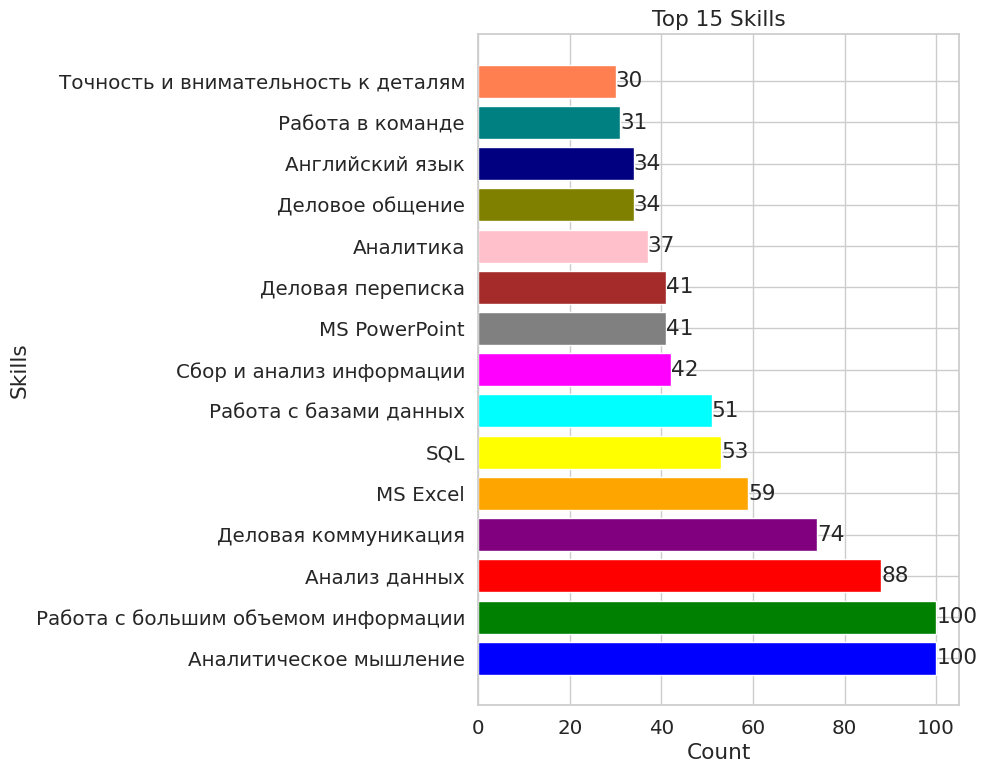

In [ ]:
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow', 'cyan', 'magenta', 'gray', 'brown',
          'pink', 'olive', 'navy', 'teal', 'coral']
bars = plt.barh(keys, values, color=colors)
plt.xlabel('Count')
plt.ylabel('Skills')
plt.title('Top 15 Skills')

for i, bar in enumerate(bars):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{values[i]}', va='center')

plt.tight_layout()
plt.show()

**Вопрос 3.** Какую зарплату готовы платить работодатели? Соберите некоторым образом статистику и постройте гистограмму.

При работе с данными о заработной плате обратите внимание на валюту и <a target="_blank" href="https://yandex.ru/search/?text=gross%2Fnet&clid=1955455&win=446&lr=213&noreask=1">gross/net</a>. Постоянно подгружать курс валюты не требуется, достаточно фиксировать какой-то один более менее актуальный.

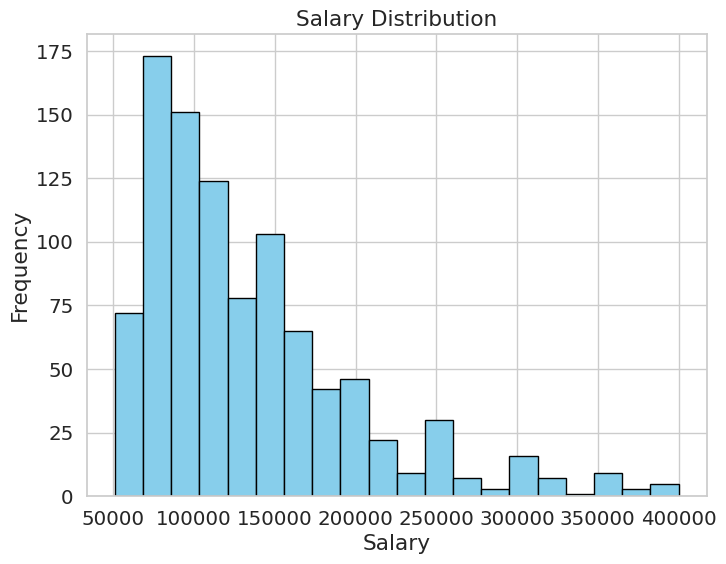

In [ ]:
df_without_salary = useful_df_analitic.dropna(subset=['from', 'currency']).copy()
df_without_salary['salary'] = df_without_salary.apply(lambda row: (row['from'] + row['to']) / 2 if pd.notnull(row['to']) and pd.notnull(row['from']) else row['from'] if pd.notnull(row['from']) else row['to'], axis=1)

df_with_salary = df_without_salary.dropna(subset=['salary']).copy()

filtered_df = df_with_salary[(df_with_salary['salary'] > 50_000) & (df_with_salary['salary'] < 500_000)]

plt.figure(figsize=(8, 6))
plt.hist(filtered_df['salary'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Salary Distribution')
plt.grid(True)
plt.show()

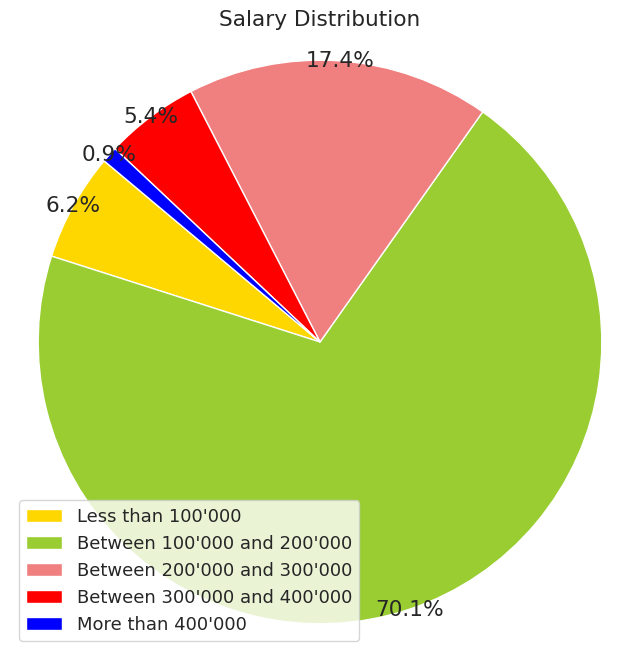

In [ ]:
labels = ['Less than 100\'000',
          'Between 100\'000 and 200\'000',
          'Between 200\'000 and 300\'000',
          'Between 300\'000 and 400\'000',
          'More than 400\'000']

less_than_50 = (df_with_salary['salary'] < 50000).sum()
between_100_and_200 = ((df_with_salary['salary'] >= 100_000) & (df_with_salary['salary'] <= 200_000)).sum()
between_200_and_300 = ((df_with_salary['salary'] >= 200_000) & (df_with_salary['salary'] <= 300_000)).sum()
between_300_and_400 = ((df_with_salary['salary'] >= 300_000) & (df_with_salary['salary'] <= 400_000)).sum()
more_than_400 = ((df_with_salary['salary'] >= 400_000)).sum()

sizes = [less_than_50, between_100_and_200, between_200_and_300, between_300_and_400, more_than_400]

colors = ['gold', 'yellowgreen', 'lightcoral', 'red', 'blue']

plt.figure(figsize=(8, 8))
plt.pie(sizes, colors=colors, autopct='%1.1f%%', startangle=140, pctdistance=1)

plt.axis('equal')
plt.title('Salary Distribution')
plt.legend(labels, loc="best", fontsize='small')
plt.show()

**Вопрос 4.** Какой формат работы предлагается (в офисе / удаленно / ...)?

In [ ]:
dict_key_schedule = {}

for cur_schedule_map in schedules:
  if cur_schedule_map == None:
    continue
  cur_schedule_id = cur_schedule_map['id']
  dict_key_schedule[cur_schedule_id] = dict_key_schedule.get(cur_schedule_id, 0) + 1

top_shedule = sorted(dict_key_schedule.items(), key=lambda x: x[1], reverse=True)

count_shedule = len(top_shedule)
print(f'count of chedule: {count_shedule}')

keys = []
values = []
for key, val in top_shedule:
  print(key)
  keys.append(key)
  values.append(val)

count of chedule: 5
fullDay
remote
flexible
shift
flyInFlyOut


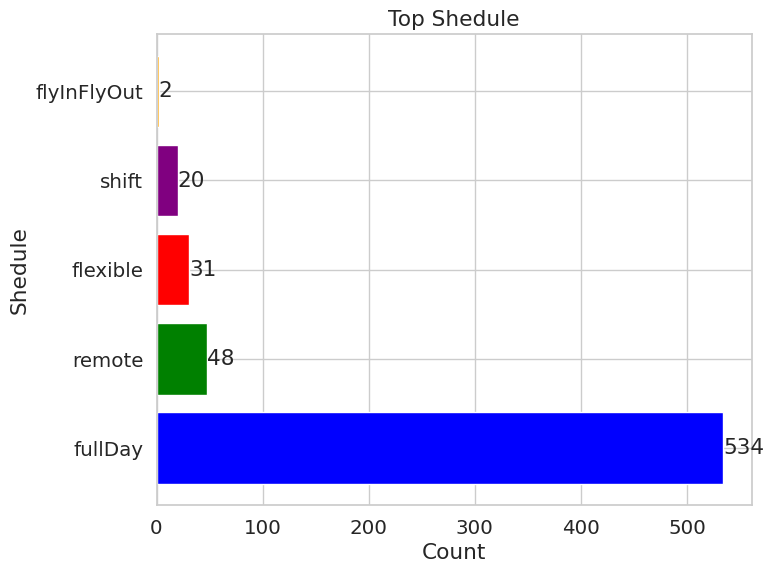

In [ ]:
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow', 'cyan', 'magenta', 'gray', 'brown',
          'pink', 'olive', 'navy', 'teal', 'coral']
bars = plt.barh(keys, values, color=colors[:count_shedule])
plt.xlabel('Count')
plt.ylabel('Shedule')
plt.title('Top Shedule')

for i, bar in enumerate(bars):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{values[i]}', va='center')

plt.tight_layout()
plt.show()

Проведите аналогичный анализ для наиболее привлекательной для вас профессии в любом регионе. Если это Data Scientist, то для анализа выберите другую. В данном пункте спокойно можно сделать копипасту кода.

В качестве наиболее привлекательной для меня профессии, я выбрал `C++ Developer`

In [ ]:
URL = 'https://api.hh.ru/vacancies'
per_page = 100

all_data = []

names_of_vacancy = ['Программист на C++',
                    'Инженер по разработке на C++',
                    'С++ разработчик',
                    'C++ программист',
                    'Разработчик ПО на C++',
                    'Специалист по разработке на C++',
                    'Программный инженер на C++',
                    'Разработчик прикладного программного обеспечения на C++',
                    'C++ инженер',
                    'Разработчик системного программного обеспечения на C++',
                    'C++ Programmer',
                    'C++ Software Engineer',
                    'C++ Software Developer',
                    'C++ Engineer',
                    'C++ Application Developer',
                    'C++ Systems Developer',
                    'C++ Application Engineer',
                    'C++ Development Engineer',
                    'C++ Development Specialist',
                    'C++ Software Architect']


for vacancy_name in names_of_vacancy:
  params = {
      'text': vacancy_name,
      'area': 1,
      'page': 0,
      "per_page": per_page,
  }

  req = requests.get(URL, params)
  data = json.loads(req.content.decode())

  found = data['found']
  pages = data['pages']

  print(f'{vacancy_name} found: {found}, pages: {pages}')

  for page in range(pages):
    params = {
      'text': vacancy_name,
      'area': 1,
      'page': page,
      "per_page": per_page,
    }

    req = requests.get(URL, params)
    data = json.loads(req.content.decode())

    vacancies = data.get('items', [])
    all_data.extend(vacancies)

df = pd.DataFrame(all_data)
df.to_csv('hh_data_Cxx_developer.csv', index=False)

Программист на C++ found: 1297, pages: 13
Инженер по разработке на C++ found: 585, pages: 6
С++ разработчик found: 1297, pages: 13
C++ программист found: 1297, pages: 13
Разработчик ПО на C++ found: 1297, pages: 13
Специалист по разработке на C++ found: 349, pages: 4
Программный инженер на C++ found: 316, pages: 4
Разработчик прикладного программного обеспечения на C++ found: 59, pages: 1
C++ инженер found: 641, pages: 7
Разработчик системного программного обеспечения на C++ found: 74, pages: 1
C++ Programmer found: 1297, pages: 13
C++ Software Engineer found: 236, pages: 3
C++ Software Developer found: 78, pages: 1
C++ Engineer found: 641, pages: 7
C++ Application Developer found: 13, pages: 1
C++ Systems Developer found: 72, pages: 1
C++ Application Engineer found: 13, pages: 1
C++ Development Engineer found: 614, pages: 7
C++ Development Specialist found: 366, pages: 4
C++ Software Architect found: 22, pages: 1


In [ ]:
df_load = pd.read_csv('hh_data_Cxx_developer.csv')

unique_df = df_load.drop_duplicates(subset=['id'])

deleted_df = unique_df.dropna(subset=['salary', 'address', 'name'])
print(f'final len: {len(deleted_df)}')
deleted_df.head(3)

final len: 257


,id,premium,name,department,has_test,response_letter_required,area,salary,type,address,...,working_time_modes,accept_temporary,professional_roles,accept_incomplete_resumes,experience,employment,adv_response_url,is_adv_vacancy,adv_context,branding
0,98565084,False,Frontend Javascript разработчик,NaN,True,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 120000, 'to': 180000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Большая Новодмит...",...,[],False,"[{'id': '96', 'name': 'Программист, разработчи...",False,"{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'full', 'name': 'Полная занятость'}",NaN,False,NaN,NaN
3,98475937,False,Разработчик / Младший разработчик C++,NaN,False,True,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 90000, 'to': None, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'улица Семёновски...",...,[],False,"[{'id': '96', 'name': 'Программист, разработчи...",False,"{'id': 'noExperience', 'name': 'Нет опыта'}","{'id': 'full', 'name': 'Полная занятость'}",NaN,False,NaN,NaN
6,98498697,False,Junior iOS разработчик,NaN,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 50000, 'to': None, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'проезд Аэропорта...",...,[],False,"[{'id': '96', 'name': 'Программист, разработчи...",False,"{'id': 'noExperience', 'name': 'Нет опыта'}","{'id': 'part', 'name': 'Частичная занятость'}",NaN,False,NaN,NaN


In [ ]:
useful_df_cxx_developer = deleted_df[['id', 'name', 'salary', 'address',]].copy()

def extract_salary(row):
    return pd.Series([ast.literal_eval(row)['from'], ast.literal_eval(row)['to'], ast.literal_eval(row)['currency']])

def extract_address(row):
    return pd.Series([ast.literal_eval(row)['lat'], ast.literal_eval(row)['lng']])


useful_df_cxx_developer[['from', 'to', 'currency']] = useful_df_cxx_developer['salary'].apply(lambda x: extract_salary(x))
useful_df_cxx_developer[['lat', 'lng']] = useful_df_cxx_developer['address'].apply(lambda x: extract_address(x))

useful_df_cxx_developer.drop(['salary', 'address'], axis=1, inplace=True)

useful_df_cxx_developer = useful_df_cxx_developer.reset_index(drop=True)
useful_df_cxx_developer.to_excel('vacancy_table_Cxx_developer.xlsx', index=False)
useful_df_cxx_developer.head()

,id,name,from,to,currency,lat,lng
0,98565084,Frontend Javascript разработчик,120000.0,180000.0,RUR,55.797670,37.584622
1,98475937,Разработчик / Младший разработчик C++,90000.0,NaN,RUR,55.777682,37.713485
2,98498697,Junior iOS разработчик,50000.0,NaN,RUR,55.797341,37.522279
3,98436934,Программист / Разработчик С++ (Qt),150000.0,220000.0,RUR,55.788717,37.741908
4,96161346,WEB-разработчик,100000.0,NaN,RUR,55.782517,37.582080


In [ ]:
print(f'final count: {len(useful_df_cxx_developer)}')

key_skills = []
schedules = []

for i in tqdm(range(len(useful_df_cxx_developer))):
  vacancy = useful_df_cxx_developer['id'].iloc[i]
  vacancy_url = f"https://api.hh.ru/vacancies/{vacancy}"

  req = requests.get(vacancy_url)
  vacancy_info = json.loads(req.content.decode())
  if 'key_skills' in vacancy_info:
    key_skills.append(vacancy_info['key_skills'])

  if 'schedule' in vacancy_info:
    schedules.append(vacancy_info['schedule'])

final count: 257


100%|██████████| 257/257 [01:38<00:00,  2.62it/s]


Топ 15 самых популярных навыков


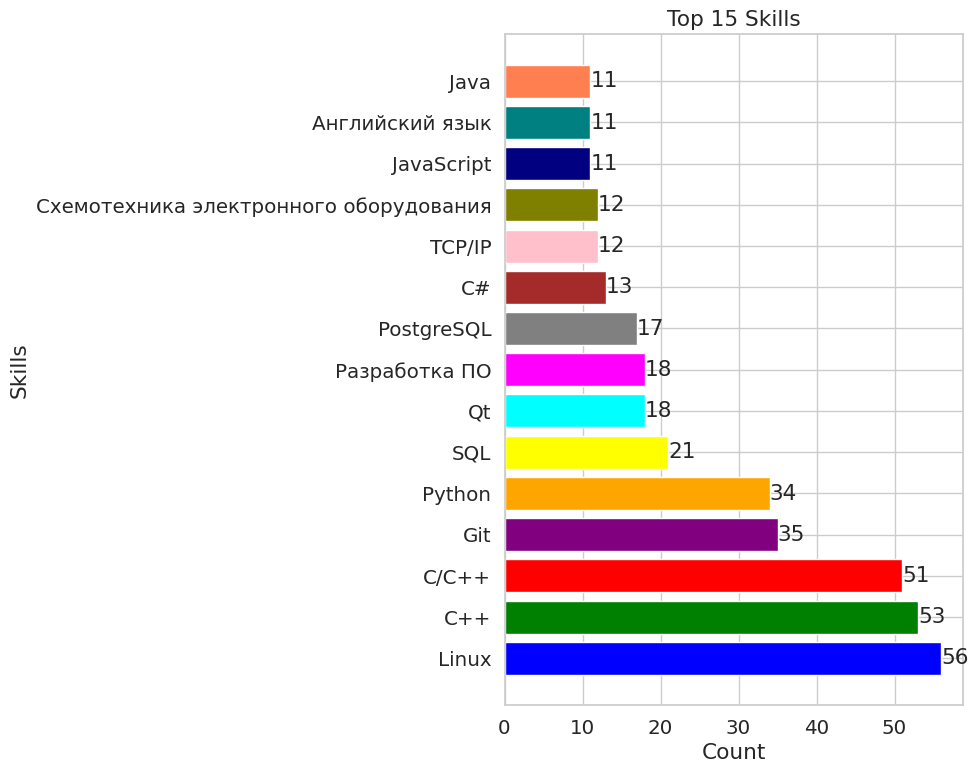

In [ ]:
dict_key_ckills = {}

for cur_skills in key_skills:
  if cur_skills == None:
    continue
  for skill in cur_skills:
    skill_name = skill['name']
    dict_key_ckills[skill_name] = dict_key_ckills.get(skill_name, 0) + 1

top_15 = sorted(dict_key_ckills.items(), key=lambda x: x[1], reverse=True)[:15]

keys = []
values = []
print('Топ 15 самых популярных навыков')
for key, val in top_15:
  keys.append(key)
  values.append(val)

plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow', 'cyan', 'magenta', 'gray', 'brown',
          'pink', 'olive', 'navy', 'teal', 'coral']
bars = plt.barh(keys, values, color=colors)
plt.xlabel('Count')
plt.ylabel('Skills')
plt.title('Top 15 Skills')

for i, bar in enumerate(bars):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{values[i]}', va='center')

plt.tight_layout()
plt.show()

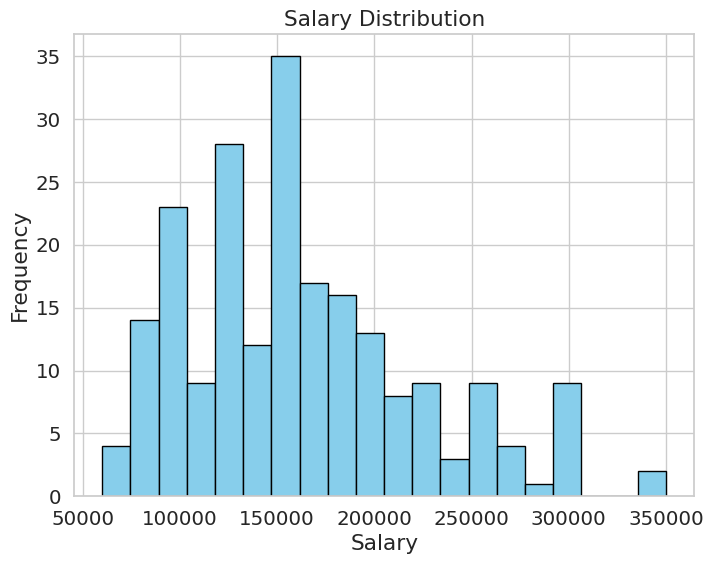

In [ ]:
df_without_salary = useful_df_cxx_developer.dropna(subset=['from', 'currency']).copy()
df_without_salary['salary'] = df_without_salary.apply(lambda row: (row['from'] + row['to']) / 2 if pd.notnull(row['to']) and pd.notnull(row['from']) else row['from'] if pd.notnull(row['from']) else row['to'], axis=1)

df_with_salary = df_without_salary.dropna(subset=['salary']).copy()

filtered_df = df_with_salary[(df_with_salary['salary'] > 50_000) & (df_with_salary['salary'] < 500_000)]

plt.figure(figsize=(8, 6))
plt.hist(filtered_df['salary'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Salary Distribution')
plt.grid(True)
plt.show()

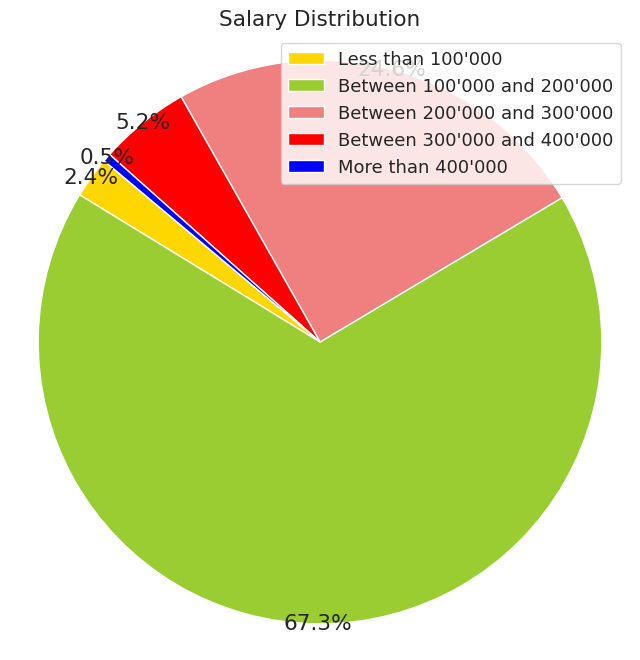

In [ ]:
labels = ['Less than 100\'000',
          'Between 100\'000 and 200\'000',
          'Between 200\'000 and 300\'000',
          'Between 300\'000 and 400\'000',
          'More than 400\'000']

less_than_50 = (df_with_salary['salary'] < 50000).sum()
between_100_and_200 = ((df_with_salary['salary'] >= 100_000) & (df_with_salary['salary'] <= 200_000)).sum()
between_200_and_300 = ((df_with_salary['salary'] >= 200_000) & (df_with_salary['salary'] <= 300_000)).sum()
between_300_and_400 = ((df_with_salary['salary'] >= 300_000) & (df_with_salary['salary'] <= 400_000)).sum()
more_than_400 = ((df_with_salary['salary'] >= 400_000)).sum()

sizes = [less_than_50, between_100_and_200, between_200_and_300, between_300_and_400, more_than_400]

colors = ['gold', 'yellowgreen', 'lightcoral', 'red', 'blue']

plt.figure(figsize=(8, 8))
plt.pie(sizes, colors=colors, autopct='%1.1f%%', startangle=140, pctdistance=1)

plt.axis('equal')
plt.title('Salary Distribution')
plt.legend(labels, loc="best", fontsize='small')
plt.show()

count of chedule: 3
fullDay
flexible
remote


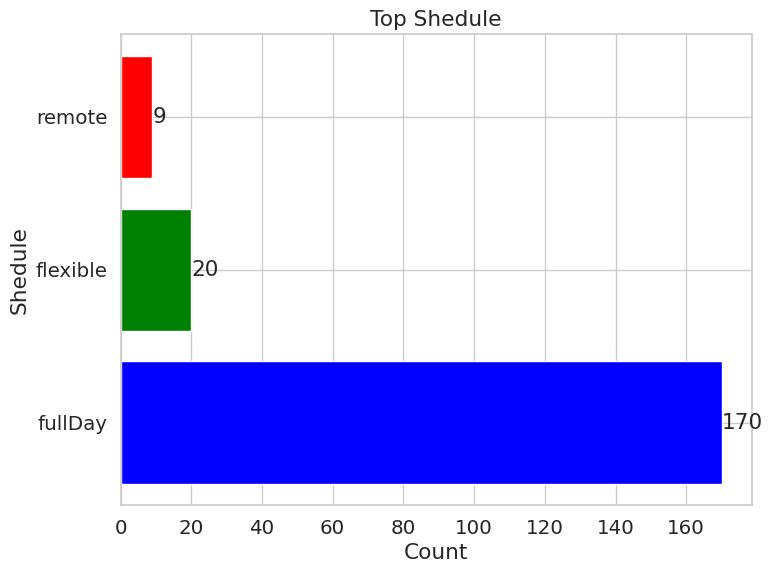

In [ ]:
dict_key_schedule = {}

for cur_schedule_map in schedules:
  if cur_schedule_map == None:
    continue
  cur_schedule_id = cur_schedule_map['id']
  dict_key_schedule[cur_schedule_id] = dict_key_schedule.get(cur_schedule_id, 0) + 1

top_shedule = sorted(dict_key_schedule.items(), key=lambda x: x[1], reverse=True)

count_shedule = len(top_shedule)
print(f'count of chedule: {count_shedule}')

keys = []
values = []
for key, val in top_shedule:
  print(key)
  keys.append(key)
  values.append(val)

plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow', 'cyan', 'magenta', 'gray', 'brown',
          'pink', 'olive', 'navy', 'teal', 'coral']
bars = plt.barh(keys, values, color=colors[:count_shedule])
plt.xlabel('Count')
plt.ylabel('Shedule')
plt.title('Top Shedule')

for i, bar in enumerate(bars):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{values[i]}', va='center')

plt.tight_layout()
plt.show()

***Ввыоды:***
1. В качестве первого выводов хотелось бы провести сравнение 1ой и 2ой профессии.
  - Во первыч хочется отметить, чтов среднем зарплата у `Разработчика на C++` больше чем у `Аналитика`, о чем нам говроит pie диаграма зарплат (видно, что часть с от 100 до 200 тысяч по процентам больше у Аналитика, а все остальные части с более 200 тыяч больше у `Разработчика на C++`). Это также заметно по гистограмме, у С++ developer она сдвинута правее.
  - Второе существенное отличие, это кол-во вакансий, на разработку с++, кол-во вакансий в разы ниже, от части это и может обуславливать разные зарплатные вилки.
  - Третье, немаловажное отличие вакансий заключается в том, что у Аналитика данных в пуле скилов находится куда больше softskill чем у разработчика. С++ developerы во сновном указывают лишь hardskillы.
  - И последнее, что хотелось бы отметить, это более гибкий график у Аналитиков. в среднем, они обладают большим выбором занятости и метста работы, нежели C++ разработчики.
2. Хотелось также отметить, что hh.ru довольно сильно ограничивает доступ к данным, а именно, евозможно получить более 2000 запросов на одну и туже вакансию, именно, поэтому хорошо использовать синонимы при url запросе. Но все же зотелось отметить довольно удобное api hh.ru, с подробным описанием:).


---

### <font color="green"><i>Факультативная часть</i></font>

---

### Задача 2.   

Для *одной* из рассмотренных ранее профессий исследуйте, в каком районе Москвы данная вакансия пользуется наибольшим и наименьшим спросом.
Не забудьте про визуализацию, в частности, постройте распределений вакансий на карте.

*Напоминание.* Работа в некоторой степени творческая, поэтому конкретные детали решения в основном остаются на усмотрение автора решения.


In [ ]:
deleted_coord = df_coord_sal.dropna(subset=['lat', 'lng'])

deleted_coord = deleted_coord.dropna(subset=['from', 'currency']).copy()
deleted_coord['salary'] = deleted_coord.apply(lambda row: (row['from'] + row['to']) / 2 if pd.notnull(row['to']) and pd.notnull(row['from']) else row['from'] if pd.notnull(row['from']) else row['to'], axis=1)

deleted_coord['dist'] = ((deleted_coord['lat'] - 55.751244)**2 + (deleted_coord['lng'] - 37.618423)**2)
deleted_coord = deleted_coord[deleted_coord['dist'] < 0.04].copy()

deleted_coord.drop(['from', 'to', 'dist'], axis=1, inplace=True)

In [ ]:
rows = 5
cols = 5

lat_min, lat_max = deleted_coord['lat'].min(), deleted_coord['lat'].max()
lng_min, lng_max = deleted_coord['lng'].min(), deleted_coord['lng'].max()
lat_step = (lat_max - lat_min) / rows
lng_step = (lng_max - lng_min) / cols

grid_salaries = np.zeros((rows, cols))
for i in range(rows):
    for j in range(cols):
        lat_range = ((deleted_coord['lat'] >= lat_min + i * lat_step) & (deleted_coord['lat'] < lat_min + (i + 1) * lat_step))
        lng_range = ((deleted_coord['lng'] >= lng_min + j * lng_step) & (deleted_coord['lng'] < lng_min + (j + 1) * lng_step))
        grid_salaries[i, j] = deleted_coord[lat_range & lng_range]['salary'].mean()

mymap = folium.Map(location=[deleted_coord['lat'].mean(), deleted_coord['lng'].mean()], zoom_start=10)

for index, row in deleted_coord.iterrows():
      folium.Marker([row['lat'], row['lng']], size=0.1, alph=0.1).add_to(mymap)

for i in range(rows):
    for j in range(cols):
        lat1, lat2 = lat_min + i * lat_step, lat_min + (i + 1) * lat_step
        lng1, lng2 = lng_min + j * lng_step, lng_min + (j + 1) * lng_step
        folium.Rectangle(bounds=[[lat1, lng1], [lat2, lng2]], color='black').add_to(mymap)

mymap.save('map_with_rectangles.html')
mymap

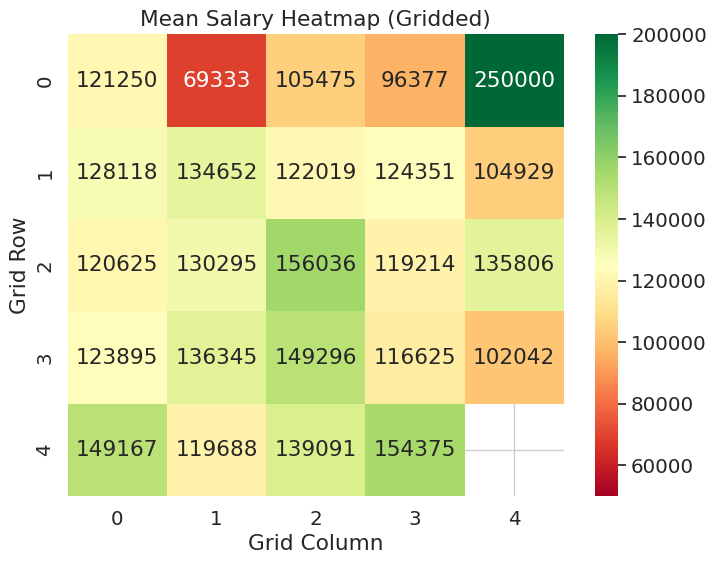

In [ ]:
grid_df = pd.DataFrame(grid_salaries, columns=np.arange(cols), index=np.arange(rows))

plt.figure(figsize=(8, 6))
sns.heatmap(grid_df,
            annot=True,
            cmap='RdYlGn',
            fmt='.0f',
            vmin=50_000,
            vmax=200_000)

plt.title('Mean Salary Heatmap (Gridded)')
plt.xlabel('Grid Column')
plt.ylabel('Grid Row')
plt.show()

***Выводы***
1. Во-первых, хочется отметить, что на карте присутствуют выбросы, а именно, точки расположенные далеко з апределами москвы, и видимо из-за удаленной работы могут считаться как московские вакансии.
2. Большинство вакансий располагаются в самой москве, и сгущаются при приближении к центру.
3. Наиболее прибылные вакансии располагаются к юго-востоку москвы, а самые не прибыльные к северо-западу. Отличие зарплат в этих районах достигает отметку в 2 раза.
4. При этом мы видим очень большую зарплату в самом верхнем правом углу. Причем если посмотреть на карту, то она находится за пределами москвы(почти - это уже пригород, и туда попадает лишь малое число вакансий), именно поэтому там и появляется анамальное значение, потому что среднее ~ одному еденственному значению.

---

### Задача 3.   

**1.** Проверьте, во скольких вакансиях среди выгруженных указана зарплата?


На основе описания вакансий с известной зарплатой попробуйте оценить ожидаемую зарплату для всех остальных вакансий. Для этого на основе текстового описания вакансии можно построить эмбеддинги (любые подходящие нейросетевые или просто one-hot кодирование). По этим эмбеддингам обучите некоторую модель предсказывать зарплату.

Не забудьте по общий пайплайн ML-моделей, а также про применимость различных методов.

**2.** Выполните кластеризацию вакансий, используя построенные эмбеддинги. Визуализируйте результаты и проинтерпретируйте кластеры.

Не забывайте про выводы.